## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
prop_conv = df.converted.mean()
prop_conv

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df[(df.group =='treatment') & (df.landing_page != 'new_page') | (df.group !='treatment') & (df.landing_page =='new_page')].count()['landing_page']

3893

f. Do any of the rows have missing values?

In [7]:
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df[(df.group == 'treatment') & (df.landing_page == 'new_page')|(df.group == 'control') & (df.landing_page == 'old_page')]

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2.group == 'treatment') == (df2.landing_page == 'new_page')) == False].shape[0]

0

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2.group == 'control') == (df2.landing_page == 'old_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
# remove duplicate by specifying user_id as argument for the subset parameter
df2 = df2.drop_duplicates(subset=['user_id'])

In [15]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
# since converted is a boolean (0 and 1), the mean will give the probability of conversion
prob_converted = df2.converted.mean()
prob_converted

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
prob_control = df2[df2.group == 'control']['converted'].mean()
prob_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
prob_treatment = df2[df2.group == 'treatment']['converted'].mean()
prob_treatment 

0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
# prob new page receivers
new_page = df2[df2.landing_page =='new_page'].count()['user_id']
prob_new = new_page/df2.count()['user_id']
prob_new

0.50006194422266881

In [20]:
#observed prob diff
obs_diff = prob_treatment - prob_control

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**The old page leads to more conversion rate because users who received the old page(control) have higher conversion probability(0.1204) than users with the new page(treatment) with a conversion rate of 0.1188.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$H_{o}$**:  **$p_{new}$** <= **$p_{old}$**

**$H_{1}$**:  **$p_{new}$** >  **$p_{old}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [21]:
# under null, we disregard the type of page(based on the assumptions in Q2). So conversion rate will the mean of converted regardless of page
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [22]:
# under null, p_old = p_new
p_old = p_new
p_old

0.11959708724499628

c. What is $n_{new}$?

In [23]:
n_new = df2[df2.landing_page =='new_page'].count()['user_id']
n_new

145310

d. What is $n_{old}$?

In [24]:
n_old = df2[df2.landing_page =='old_page'].count()['user_id']
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
# use np.random.binomial to draw samples from binomial distribution. using p_new for their probability as the probability of conversion.

# new_page_converted = np.random.choice([0,1], size = n_new, p = [1-p_new, p_new])
new_page_converted = np.random.binomial(1, p_new, n_new)

# preview to confirm simulation
new_page_converted[:5]

array([1, 0, 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
#repeat (e) for n_old
# old_page_converted = np.random.choice([0,1], size = n_old, p = [1-p_old, p_old])
old_page_converted = np.random.binomial(1, p_old, n_old)
# preview to confirm simulation
old_page_converted[:5]

array([0, 1, 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
np.mean(new_page_converted) - np.mean(old_page_converted)

-8.4550823046730672e-05

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [28]:
# simulate the difference
new_converted_simulation = np.random.binomial(n_new, p_new,  10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old,  10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

# preview to confirm simulation
p_diffs[:10]

array([ -2.08488726e-04,   3.48969210e-04,  -1.26099367e-04,
        -1.25788989e-04,  -1.44736808e-03,   1.68381742e-03,
         1.14037726e-03,  -8.47469408e-05,  -2.94449513e-05,
         1.91804381e-03])

In [29]:
lower, upper = np.percentile(p_diffs, 2.5), np.percentile(p_diffs, 97.5)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

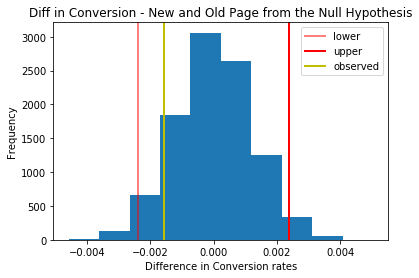

In [30]:
plt.hist(p_diffs);
plt.axvline(x=lower, color='r', alpha=0.5, linewidth=2, label = 'lower');
plt.axvline(x=upper, color='r', linewidth=2, label = 'upper');

plt.axvline(x=obs_diff, color='y', linewidth=2, label = 'observed');
plt.title('Diff in Conversion - New and Old Page from the Null Hypothesis');
plt.xlabel('Difference in Conversion rates');
plt.ylabel('Frequency');
plt.legend();
plt.show();

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [31]:
# proportion of p_diffs that are greater than p_diff(difference observed in ab_data.csv)
(p_diffs > obs_diff).mean()

0.90659999999999996

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**It is the probability of getting an extreme test statistic than the observed test statistic, given that the null hypothesis is true.**

**It is called the p-value.**

**From the above, the p-value is bigger than the alpha threshold (0.05) and therefore we fail to reject the null hypothesis that there is no difference between the conversion rates for both pages.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
import statsmodels.api as sm

convert_old = df2[df2.landing_page =='old_page'].sum()['converted']
convert_new = df2[df2.landing_page =='new_page'].sum()['converted']
n_old = df2[df2.landing_page =='old_page'].count()['user_id']
n_new = df2[df2.landing_page =='new_page'].count()['user_id']

convert_old, convert_new, n_old, n_new

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [33]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [34]:
#import package
from scipy.stats import norm

In [35]:
# how significant our z-score is
norm.cdf(z_score)

0.90505831275902449

In [36]:
# critical value at 95% confidence interval (Q1)
norm.ppf(1-(0.05/2))

1.959963984540054

**Since the z-score is less than the critical value, we fail to reject the null hypothesis that there is no difference between the conversion rates for both pages.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
# add intercept column
df2['intercept'] = 1

In [38]:
# convert group values to 1 or 0 depending on whether it's 'treatment' or 'control'
df2[['no_ab_page','ab_page']] = pd.get_dummies(df2.group)

# drop no_ab_page column
df2 = df2.drop('no_ab_page', axis=1)

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [39]:
logit_mod = sm.Logit(df2.converted, df2[['intercept','ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [40]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 25 Jul 2018   Pseudo R-squ.:               8.077e-06
Time:                        00:19:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""


**p-value = 0.190.**

**Part II is a one-tailed test with focus on the null hypothesis (**$p_{new}$** = **$p_{old}$**), whereas Part III (**$p_{new}$** $\neq$  **$p_{old}$**) is a two-tail test focusing on the alternative.**

In [42]:
# Convert the above two-tailed test p-value to a one-test p-value
one_test_pvalue = 1 - 0.19/2
one_test_pvalue

0.905

This is consistent with our results so far.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Considering other factors is a good idea because there is a lot of other factors including [performance, SEOs, customer service, etc](https://www.textmaster.com/blog/7-factors-improving-conversion-rates/) that could influence conversion.**

**There are disadvantages for adding additional terms into your model. One such disadvantage is the [Simpson's Paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox), where a trend appears in several different groups of data but disappears or reverses when these groups are combined.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [43]:
# load countries csv file
countries_df = pd.read_csv('countries.csv')

# join df2 to countries dataset
df_joined = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

#preview
df_joined.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [44]:
# get unique country list.
df_joined.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [45]:
#  create columns for the dummy variables
df_joined[['CA', 'UK', 'US']] = pd.get_dummies(df_joined.country)
df_joined = df_joined.drop(['CA'], axis=1)
df_joined.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


In [46]:
# Fit Your Linear Model And Obtain the Results
logit_mod = sm.Logit(df_joined['converted'], df_joined[['intercept','ab_page', 'US', 'UK']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [47]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 25 Jul 2018   Pseudo R-squ.:               2.323e-05
Time:                        00:20:15   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

**Both the z_score and the p-value changed after joining the countries. In particular, the p-value changed increased from 0.190 to 0.191, which improves the earlier position that we fail to reject the null hypothesis that there is no difference between the conversion rates for both pages.**

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [48]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0